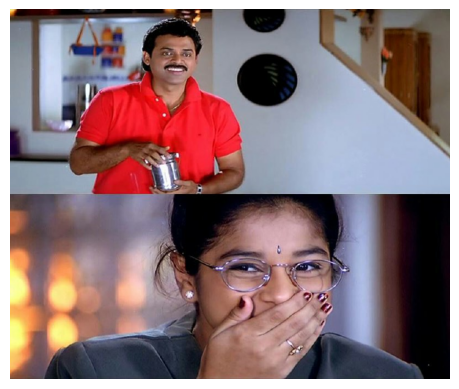

In [3]:
import cv2
import matplotlib.pyplot as plt

# Specify the path to the image
image_path = r"/Users/surya/Documents/All/templates/photo_2024-11-19_17-48-40 (3).jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Convert the image from BGR to RGB format for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


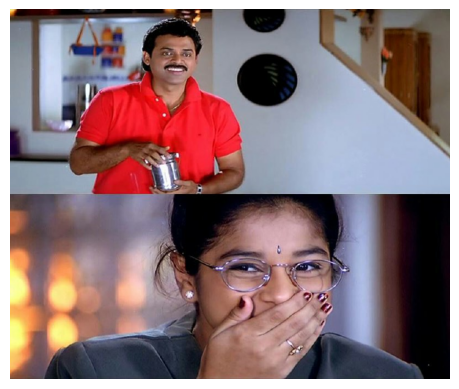

Cropping Images


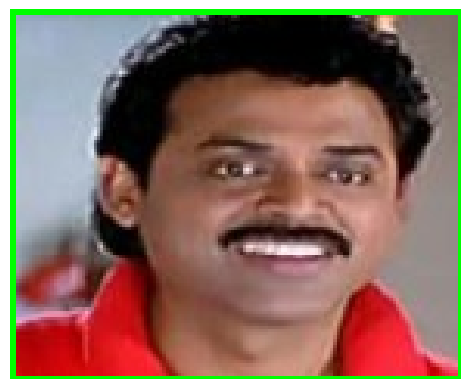

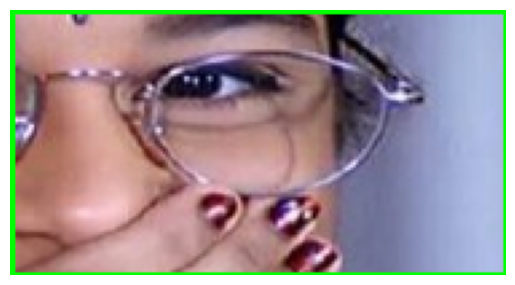

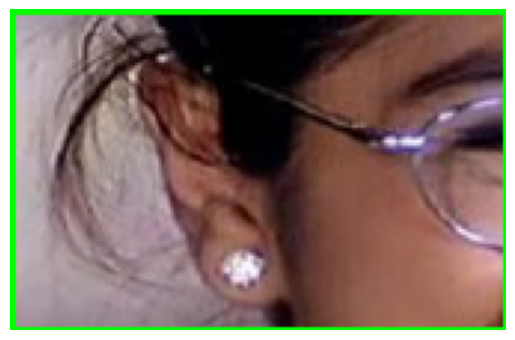

In [9]:
import cv2
import matplotlib.pyplot as plt

# Specify the path to the image
image_path = r"/Users/surya/Documents/All/templates/photo_2024-11-19_17-48-40 (3).jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Convert the image from BGR to RGB format for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image

# Global variables
drawing = False  # Flag to indicate if mouse is pressed
pt1 = (-1, -1)  # Starting point of the rectangle
pt2 = (-1, -1)  # Ending point of the rectangle
crop_img = None  # To store the cropped image


# Mouse callback function
print("Cropping Images")
def draw_rectangle(event, x, y, flags, param):
    global drawing, pt1, pt2, crop_img, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pt1 = (x, y)
        pt2 = (x, y)  # Initialize both points to the same position
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            pt2 = (x, y)  # Update the ending point while moving
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        pt2 = (x, y)  # Finalize the ending point when mouse button is released
        cv2.rectangle(img, pt1, pt2, (0, 255, 0), thickness=2)
        # Validate cropping coordinates
        x1, y1 = max(0, min(pt1[0], pt2[0])), max(0, min(pt1[1], pt2[1]))
        x2, y2 = min(img.shape[1], max(pt1[0], pt2[0])), min(img.shape[0], max(pt1[1], pt2[1]))
        # Crop the image safely
        crop_img = img[y1:y2, x1:x2]
        if crop_img.size > 0:
            # Display the cropped image using Matplotlib
            plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
        else:
            print("Invalid crop region. No image content.")


# Load the image
image_path # Replace with the path to your image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Resize the image for display purposes
img = cv2.resize(img, (800, 600))

# Create a window and bind the mouse callback function
cv2.namedWindow("Canvas")
cv2.setMouseCallback("Canvas", draw_rectangle)

# Main loop to display the canvas and handle events
while True:
    canvas = img.copy()  # Create a copy of the canvas to keep the original intact
    if drawing:
        cv2.rectangle(canvas, pt1, pt2, (0, 255, 0), thickness=2)  # Draw the rectangle while dragging
    cv2.imshow("Canvas", canvas)

    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Press 'Esc' to exit
        break

# Close all OpenCV windows
cv2.destroyAllWindows()